# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import necessary libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set Seaborn style and palette
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("magma", n_colors=24)

In [2]:
# Set up the browser
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup_obj = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_rows = soup_obj.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    cols = row.find_all('td')
    data.append([col.text for col in cols])

print(data)

[[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], [

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
table_df = pd.DataFrame(data, columns=columns)
table_df = table_df.drop(0)

In [8]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(table_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
table_df['terrestrial_date'] = pd.to_datetime(table_df['terrestrial_date'])
table_df[['id', 'sol', 'ls', 'month', 'min_temp', 'pressure']] = table_df[['id', 'sol', 'ls', 'month', 'min_temp', 'pressure']].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(table_df.dtypes)

id                         float64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

mars_months = table_df['month'].nunique()
print(f"{mars_months} months exist on Mars.")


12 months exist on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?
martian_days = table_df['sol'].nunique()
print(f"There are {martian_days} Martian days' worth of data")


There are 1867 Martian days' worth of data


In [14]:
# 3. What is the average low temperature by month?
avg_min_temp = table_df.groupby('month')['min_temp'].mean()
print("Average low temperature by month:")
print(avg_min_temp)


Average low temperature by month:
month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


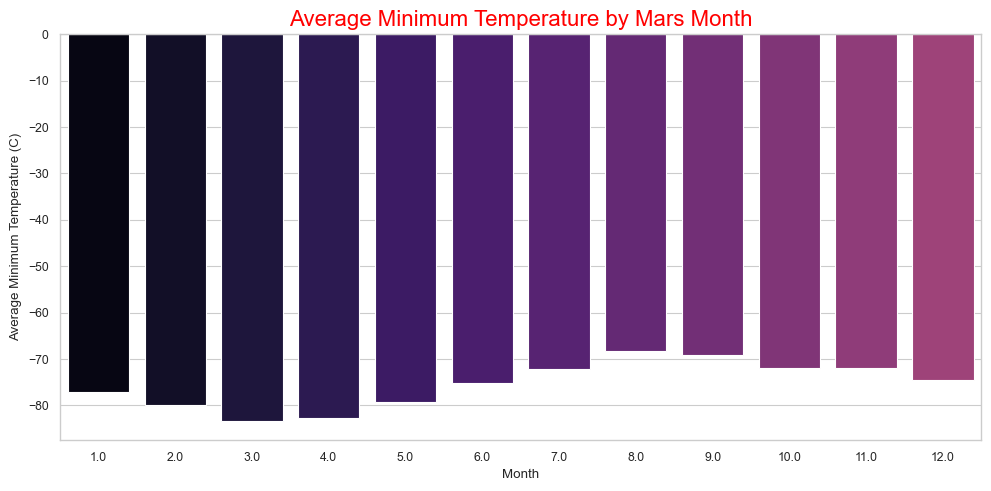

In [15]:
# Plot the average temperature by month
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_min_temp.index, y=avg_min_temp.values)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (C)")
plt.title("Average Minimum Temperature by Mars Month", color='red', fontsize=16)
plt.tight_layout()
plt.savefig('../Images/avg_temp_mars.png', dpi=300)
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
coldest = avg_min_temp.idxmin()
hottest = avg_min_temp.idxmax()

print(f"The coldest month in Curiosity's location is month {coldest}")
print(f"The hottest month in Curiosity's location is month {hottest}")

The coldest month in Curiosity's location is month 3.0
The hottest month in Curiosity's location is month 8.0


In [17]:
# 4. Average pressure by Martian month
avg_pressure = table_df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


The following code creates a bar chart showing the average atmospheric pressure for each Martian month. The x-axis represents the months, and the y-axis represents the average pressure in Pascals (Pa).

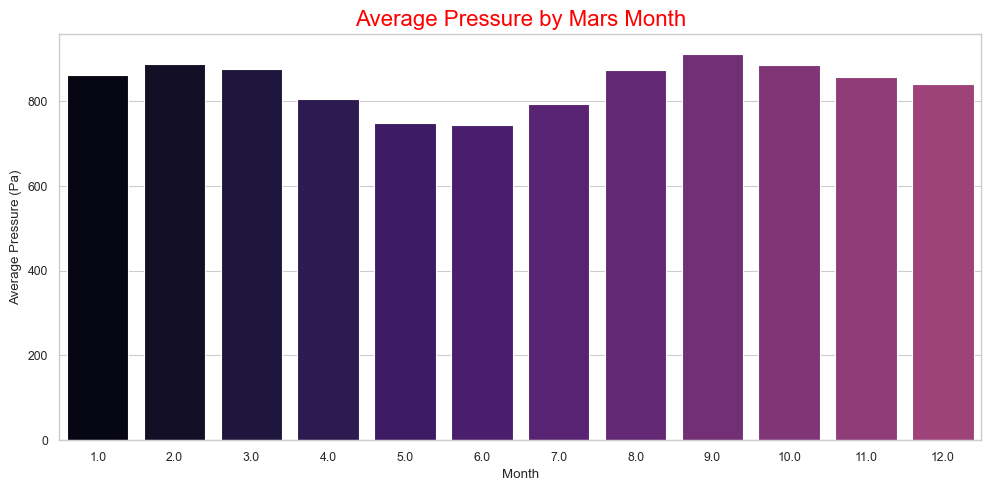

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_pressure.index, y=avg_pressure.values)
plt.xlabel("Month")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Pressure by Mars Month", color='red', fontsize=16)
plt.tight_layout()
plt.savefig('../Images/avg_pa_mars.png', dpi=300)
plt.show()


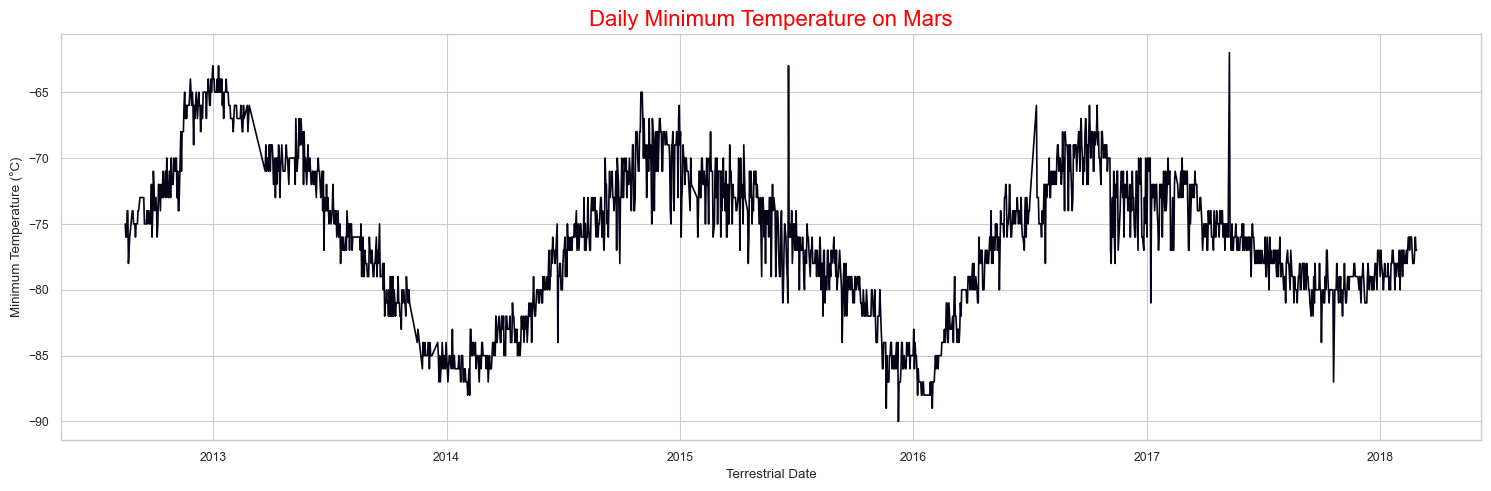

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# This plot displays daily minimum temperature variations over time. 
# You can visually estimate the period of a Martian year by looking for repeating patterns in the temperature data. 
# The 687 Earth days in a Martian year is a known fact, but the plot helps provide context and shows how the temperature changes over time.

plt.figure(figsize=(15, 5))
sns.lineplot(x=table_df['terrestrial_date'], y=table_df['min_temp'])
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars", color='red', fontsize=16)
plt.tight_layout()
plt.savefig('../Images/daily_temp_mars.png', dpi=300)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
table_df.to_csv('mars_data.csv', index=False)

In [21]:
browser.quit()